# GWU STAT 4197/6197

### Week 7_Part2 - SAS Code Examples: ODS Output Destination, and Formatting PROC Output Using ODS

* ODS Destination
* Select Results Objects from PROC Steps Using ODS
* Create New Data Tables
* Change the Output Format

#### (Source: SAS Documentation for Code Explanation)



In [38]:
*Ex5_ODS_RTF_PDF_EXCEL.sas (Part 2);
ods pdf file="&Path\Heart_Tabulate.PDF"; 
PROC TABULATE data=sashelp.heart format=comma7. ;
  TITLE1 'Mean Weight by Blood Presuure Levels';
  TITLE2 'SASHELP.HEART Data Set';
  CLASS sex BP_Status;
  VAR  weight;
  KEYLABEL N='Total'  mean = 'Mean (lbs)';
  TABLE (Sex*BP_Status='Blood Pressure Category' all),
        (N weight*mean);
run;
ods pdf close;


In [51]:
*Ex5_ODS_RTF_PDF_EXCEL.sas (Part 3);
ods excel file="&Path\Heart_Tabulate.xlsx" 
   options(row_heights="0,0,0,14,0,0" sheet_interval='PROC'
                  sheet_name="SASHELP_Heart" 
                  embedded_titles="yes");
PROC TABULATE data=sashelp.heart format=comma7. ;
  TITLE1 'Mean Weight by Blood Presuure Levels';
  TITLE2 'SASHELP.HEART Data Set';
  CLASS BP_Status sex;
  VAR  weight;
  KEYLABEL N='Total'  mean = 'Mean (lbs)';
  TABLE (sex*BP_Status='Blood Pressure Category' all),
        (N weight*mean);
  run;
  ods excel close;
  title1;

In [53]:
*Ex5_ODS_RTF_PDF_EXCEL.sas (Part 4);
options nosource;
* Open several ODS destinations;
ods html file="C:\Data\report_h.html";
ods pdf file="C:\Data\report_p.pdf" notoc;
ods rtf file="C:\Data\report_r.rtf" bodytitle;
ods excel file="C:\Data\report_e.xlsx"
      options(sheet_name="Sheet1"); 
ods output variables=variables_class;
* Select only the "variables" table;
ods select variables;
* Turn off proc titles;
ods noproctitle;
* Run the Contents Procedure;
proc contents data=sashelp.class p; 
ods select variables
run; 
ODS _ALL_ CLOSE;

In [54]:
*Ex5_ODS_RTF_PDF_EXCEL.sas (Part 5);
ods rtf(1) file="C:\Data\Complete_output.rtf" ;
ods rtf(2) file="C:\Data\Partial_output.rtf" ;
ods rtf(2) select univariate.weight.moments;
Title "Proc Univariate for Weight";
Proc Univariate data = sashelp.class;
var weight;
run;
ods _all_ close;
title;

In [55]:
*Ex5_ODS_RTF_PDF_EXCEL.sas (Part 6);
*Traffic-lighting;
options nocenter nodate nonumber;
PROC FORMAT;
VALUE weightf
0 - < 150 = 'light green'
150 - < 170 = 'light yellow'
170 - HIGH = 'light red';
run;
ods html file= 'C:\Data\Traffic_Lighting.html';
Proc print data = sashelp.heart (obs = 20);
var status sex height weight;
format weight weightf.;
run;

Obs,Status,Sex,Height,Weight
1,Dead,Female,62.50,light green
2,Dead,Female,59.75,light red
3,Alive,Female,62.25,light green
4,Alive,Female,65.75,light yellow
5,Alive,Male,66.00,light yellow
6,Alive,Female,61.75,light green
7,Alive,Female,64.75,light green
8,Dead,Male,65.50,light green
9,Alive,Male,71.00,light red
10,Dead,Male,62.50,light green



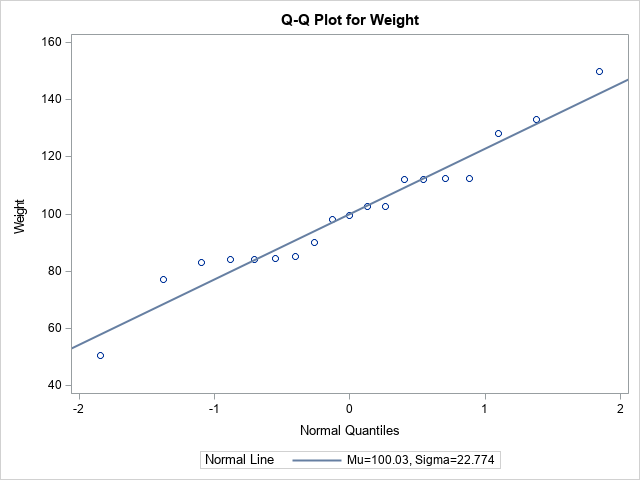

In [56]:
*Ex7_ODS_Files.sas;
options nocenter nodate nonumber nosource;
ods trace on;
  proc univariate data=SASHELP.CLASS;    
  var weight;   
  qqplot weight / normal(mu=est sigma=est); 
run; ods 
trace off; 

In [ ]:
ods listing;
ods output basicmeasures=measures;
ods select basicmeasures;
proc univariate data=sashelp.class noprint;
var weight;
run;
proc print data=measures; run;

In [58]:

ODS html;
ODS OUTPUT ExtremeObs = Extreme_Obs_x;
ODS SELECT ExtremeObs;
proc univariate data=sashelp.class;
var weight;
run;
ODS html CLOSE;

In [59]:
proc univariate data=sashelp.class noprint;
  var weight;
  output out=stats mean=mean_weight
                   median=median_weight;
run;
proc print data=stats; run;

Obs,mean_weight,median_weight
1,100.026,99.5


In [ ]:
ods pdf;
ods pdf file = 'C:\Data\FromProcFreq.pdf';
ods output CrossTabFreqs=CrossTab_Freqs;
proc freq data=sashelp.heart noprint ; 
 tables weight_status*bp_status ;
 WHERE sex='Male';
run;
ods pdf close;
proc print data=CrossTabFreqs;
run;


In [67]:
*Ex10_Freq_ods_output_crosstabs.sas (Part 1);
options nocenter nodate nonumber;
*The following code was obtained from SAS_L
ods output crosstabfreqs=summary;
proc freq data=sashelp.class  noprint;
table sex*(_all_)/out=summary;
run;
proc print data=summary; run;

Obs,Sex,Weight,COUNT,PERCENT
1,F,50.5,1,5.26316
2,F,77.0,1,5.26316
3,F,84.0,1,5.26316
4,F,84.5,1,5.26316
5,F,90.0,1,5.26316
6,F,98.0,1,5.26316
7,F,102.5,1,5.26316
8,F,112.0,1,5.26316
9,F,112.5,1,5.26316
10,M,83.0,1,5.26316


In [8]:
*Ex9_Surveymeans_ODS_RTF.sas (Part 3);
data new;
set ALL Male;
Label age_grp = 'Age Group'
      sex = 'Sex'
      mean= 'Weighted Annual Mean *Health Care Expenses ($)'
      StdErr= 'Standard Error';
run;
proc format;
value $sex_fmt .='Both Sexes';
run;

In [9]:
*Ex9_Surveymeans_ODS_RTF.sas (Part 4);
ods path (prepend) work.templat(update);
proc template;
     define style styles.test;
       parent=styles.journal;
      class HeadersAndFooters /
             font=(Arial,12pt);    
       class SystemTitle from TitlesAndFooters /
             font=(Arial,12pt);
      class SystemFooter/font=(Arial,12pt);
     end;
   run;

* Creating customized tables and reports by using the following statements

    * ODS CSV FILE = "file_name.csv"; 
    * ODS EXCEL FILE = "file_name.xlsx"; 
    

In [ ]:
ods csv file= 'C:\sascourse\week7\class7.csv ';
proc print data = sashelp.class noobs;
run;
ods csv close;

In [ ]:
ods Excel file= 'C:\test\class8.xlsx';
proc print data = sashelp.class noobs;
run;
ods Excel close;

In [ ]:
ods excel file="c:\sascourse\week2\class6.xlsx";
ods excel options(sheet_name="class" sheet_interval="none" start_at="B1");
proc print data=sashelp.class;
run;

In [ ]:
libname myxls xlsx "c:\sascourse\week2\class5.xlsx" ;
data myxls.class5;
 set sashelp.class;
 run;
libname myxls clear;